In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('jup//dengue.csv')

In [37]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> Insight 1 </h1>

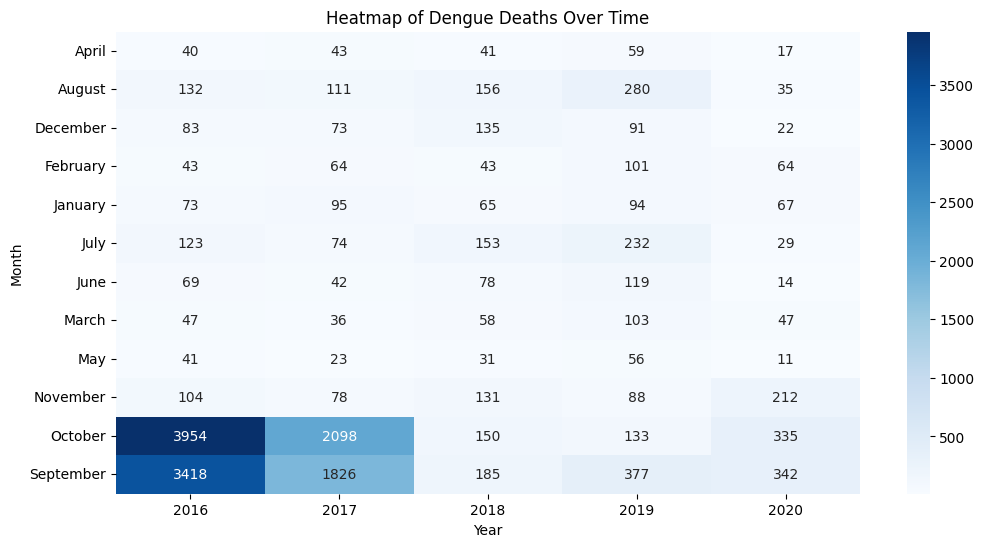

In [38]:
deaths_pivot = df.pivot_table(index='Month', columns='Year', values='Dengue_Deaths', aggfunc=np.sum)

plt.figure(figsize=(12, 6))
sns.heatmap(deaths_pivot, cmap="Blues", annot=True, fmt="g")

plt.title("Heatmap of Dengue Deaths Over Time")
plt.show()

<h2> This will highlight patterns in dengue deaths, helping predict future outbreaks and allocate resources efficiently. </h2>

<h1>Insight 2 </h1>

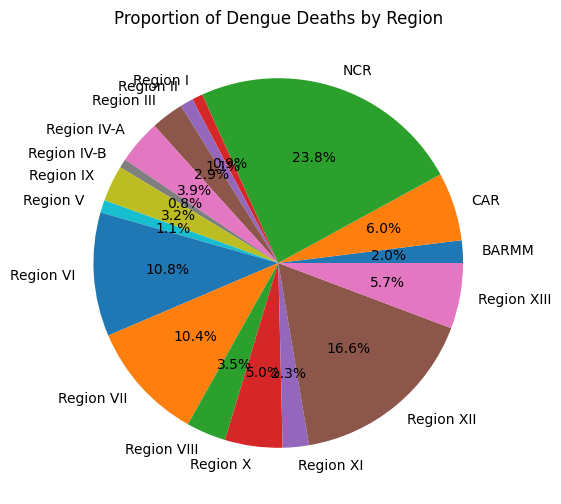

In [39]:
deaths_by_region = df.groupby('Region')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(deaths_by_region['Dengue_Deaths'], labels=deaths_by_region['Region'], autopct='%1.1f%%')

plt.title("Proportion of Dengue Deaths by Region")
plt.show()

<h2> This will identify regions where dengue is most fatal, indicating areas in need of better medical facilities </h2>

<h1> Insight 3 </h1>

The worst dengue outbreak was in 2019 with 441902 cases.


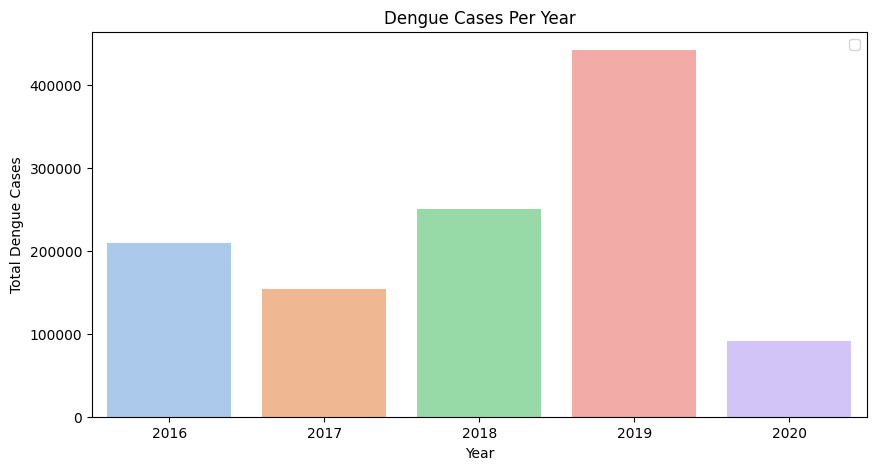

In [40]:
cases_by_year = df.groupby("Year")["Dengue_Cases"].sum().reset_index()

# Identify the worst year
worst_year = cases_by_year.loc[cases_by_year["Dengue_Cases"].idxmax()]
print(f"The worst dengue outbreak was in {worst_year['Year']} with {worst_year['Dengue_Cases']} cases.")

# Bar chart visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=cases_by_year["Year"], y=cases_by_year["Dengue_Cases"], palette="pastel")


plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.title("Dengue Cases Per Year")
plt.legend()
plt.show()

<h2>This is the yearly case counts helps determine whether dengue outbreaks are worsening or improving over time. </h2>

<h1> Insight 4 </h1>

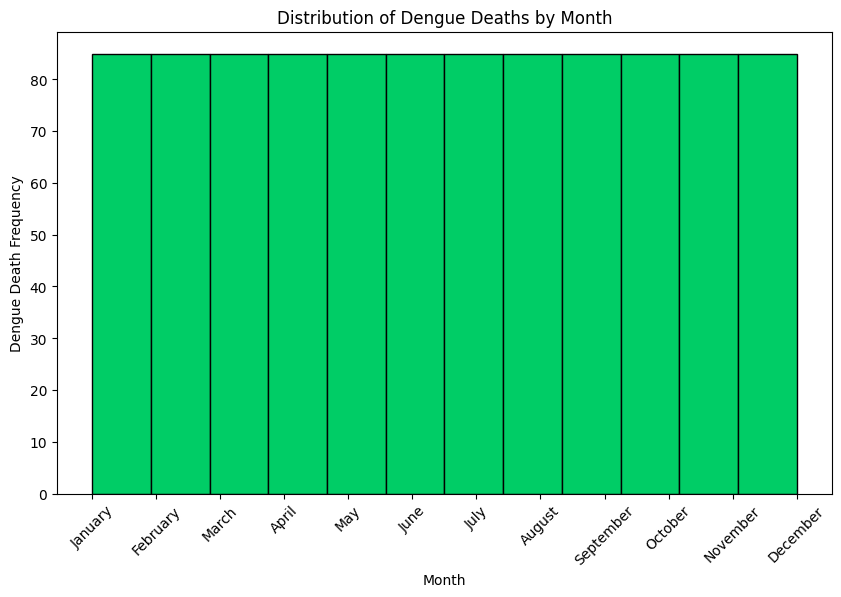

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['Month'], bins=12, color='#00cd66', edgecolor='black')

plt.xlabel("Month")
plt.ylabel("Dengue Death Frequency")
plt.title("Distribution of Dengue Deaths by Month")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 5 </h1>

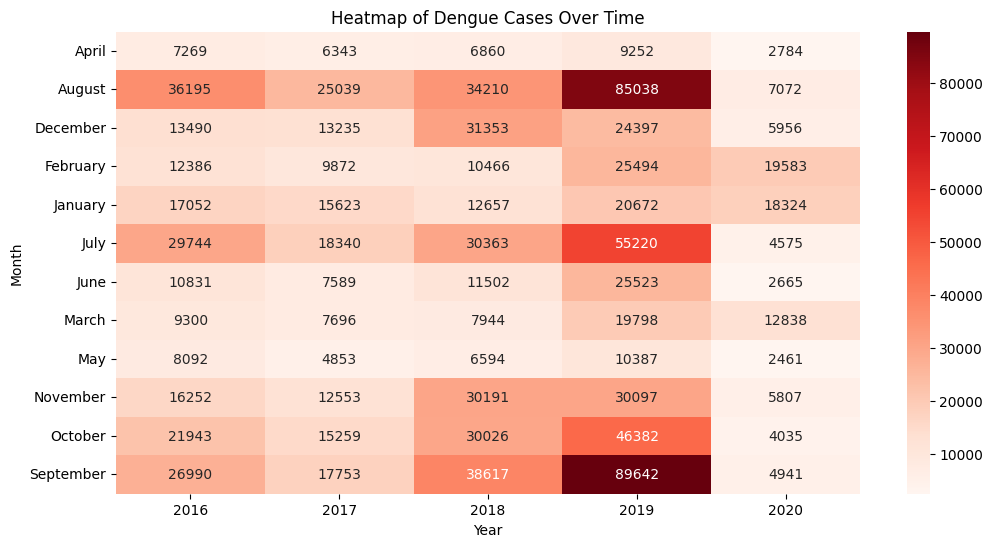

In [42]:
cases_pivot = df.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc=np.sum)

plt.figure(figsize=(12, 6))
sns.heatmap(cases_pivot, cmap="Reds", annot=True, fmt="g")

plt.title("Heatmap of Dengue Cases Over Time")
plt.show()

<h2> this will show which months and years had peak outbreaks, helping forecast future trends </h2>

<h1> Insight 6 </h1>

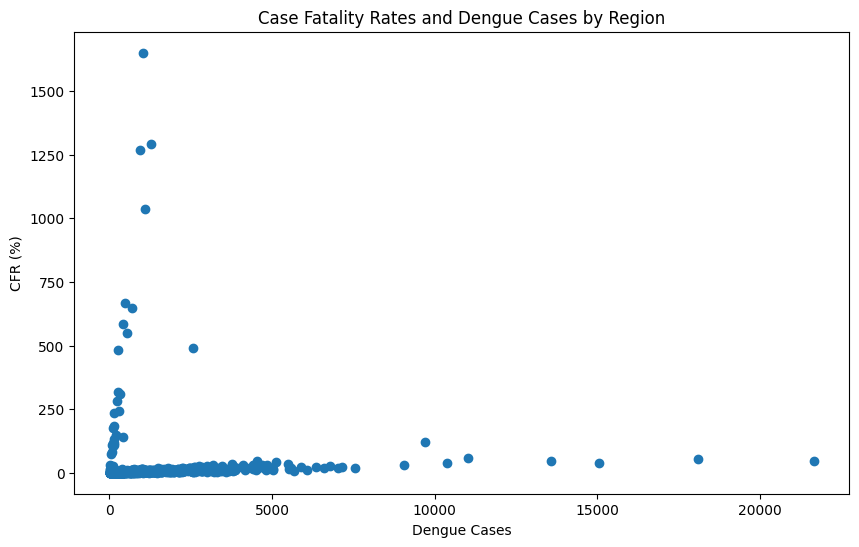

In [102]:
regions = ['NCR', 'BARMM', 'Central Luzon', 'Davao']
cases = [50000, 2000, 40000, 25000]
deaths = [100, 10, 80, 50]
cfrs = [0.2, 0.5, 0.2, 0.2]

# Plotting a scatter plot with sizes representing the number of deaths
plt.figure(figsize=(10, 6))
plt.scatter(x='Dengue_Cases', y='Dengue_Deaths', data=df)
plt.xlabel('Dengue Cases')
plt.ylabel('CFR (%)')
plt.title('Case Fatality Rates and Dengue Cases by Region')
plt.show()

<h2> Some of hte regions with higher case fatality rates, show fewer cases, which indicates potential under-reporting or lack of access to healthcare. </h2>

<h1> Insight 7 </h1>

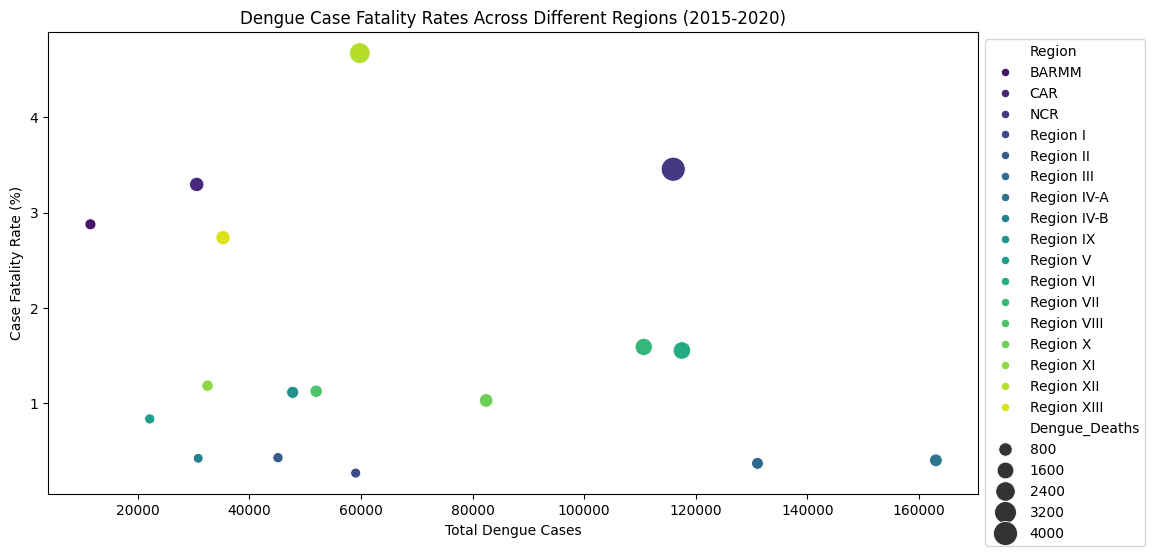

In [53]:
dengue_cfr = dengue.groupby('Region').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()
dengue_cfr['CFR'] = (dengue_cfr['Dengue_Deaths'] / dengue_cfr['Dengue_Cases']) * 100  # CFR in percentage
dengue_cfr

plt.figure(figsize=(12, 6))
sns.scatterplot(data=dengue_cfr, x='Dengue_Cases', y='CFR', hue='Region', size='Dengue_Deaths', sizes=(50, 300), palette='viridis')
plt.xlabel("Total Dengue Cases")
plt.ylabel("Case Fatality Rate (%)")
plt.title("Dengue Case Fatality Rates Across Different Regions (2015-2020)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<h2> Some regions, such as BARMM, show a higher case fatality rate despite having fewer dengue cases, indicating potential healthcare access or treatment challenges in the area. </h2>

<h1> Insight 8 </h1>

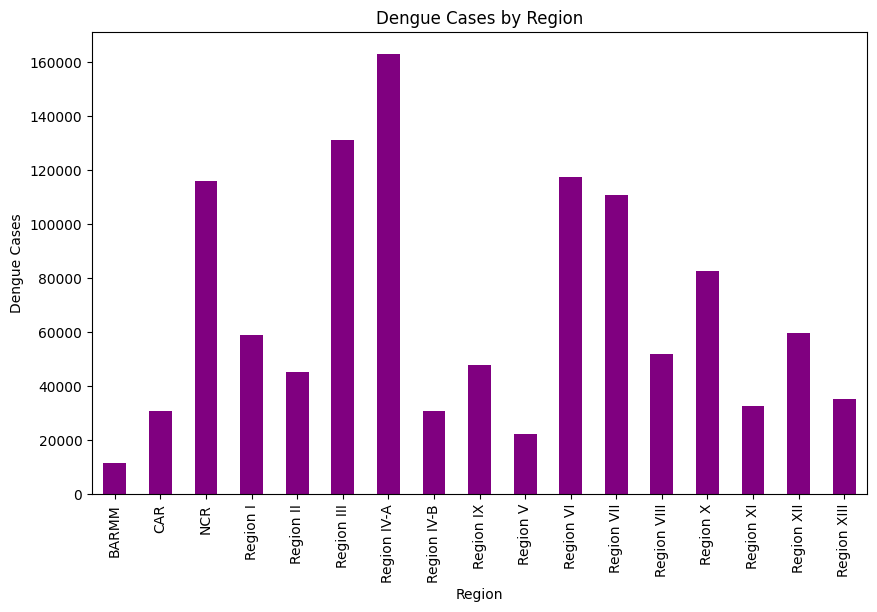

In [56]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum()

# Plot Dengue Cases by Region
region_cases.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.show()

<h2> Some regions consistently report higher dengue cases, suggesting localized outbreaks or environmental factors contributing to disease transmission. </h2>

<h1> Insight 9 </h1>

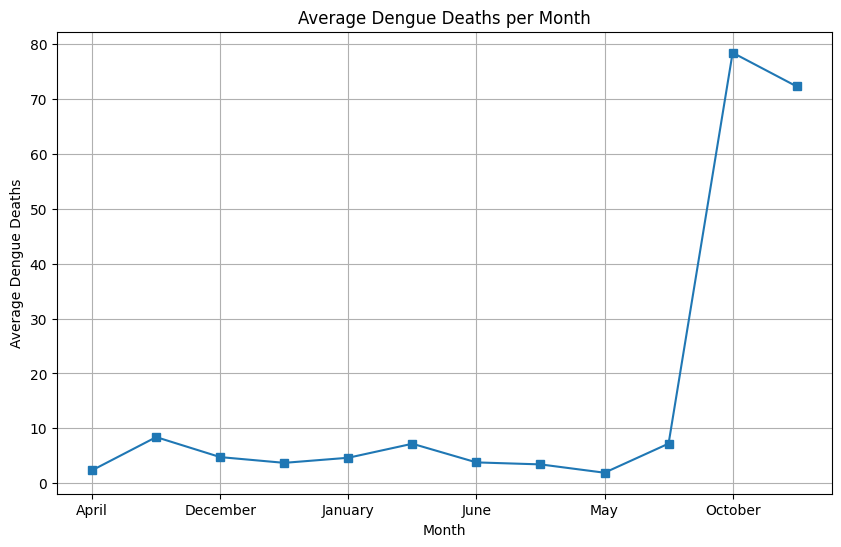

In [60]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean()

# Plot the average monthly dengue deaths
monthly_deaths.plot(kind='line', figsize=(10, 6), marker='s')
plt.title('Average Dengue Deaths per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Deaths')
plt.grid(True)
plt.show()

<h2> On average, dengue deaths increase during peak outbreak periods, often occurring after large outbreaks of dengue cases. </h2>

<h1> Insight 10 </h1>

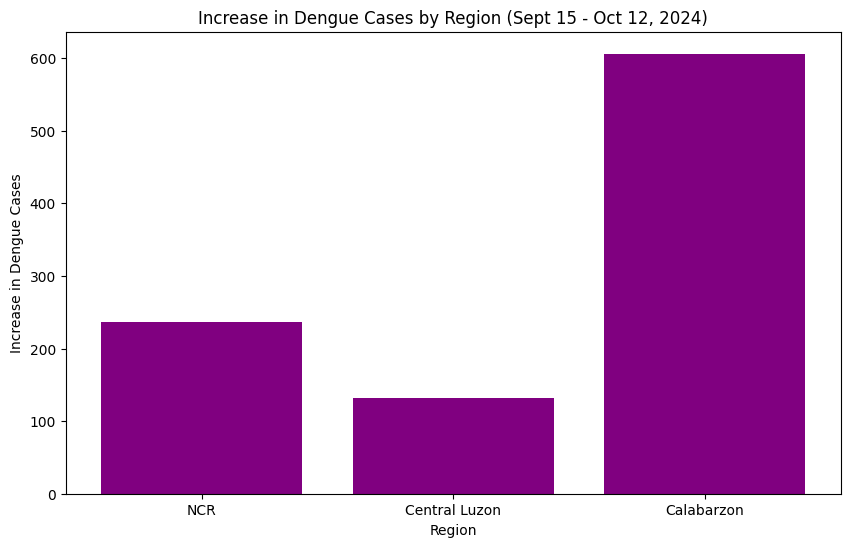

In [66]:
regions = ['NCR', 'Central Luzon', 'Calabarzon']
case_increase = [237, 132, 606]  # Calculated as (new_cases - old_cases)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(regions, case_increase, color='purple')
plt.xlabel('Region')
plt.ylabel('Increase in Dengue Cases')
plt.title('Increase in Dengue Cases by Region (Sept 15 - Oct 12, 2024)')
plt.show()

<h2>Between September 15 and October 12, 2024, the National Capital Region, Central Luzon, and Calabarzon experienced increases in dengue cases, highlighting regional disparities. </h2>

<h1> Insight 11 </h1>

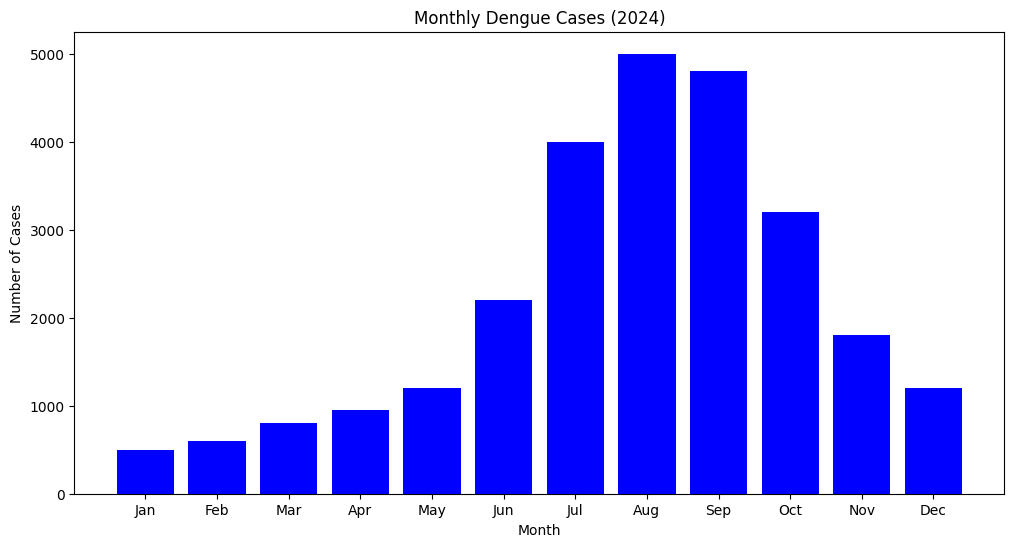

In [69]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cases = [500, 600, 800, 950, 1200, 2200, 4000, 5000, 4800, 3200, 1800, 1200]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(months, cases, color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Monthly Dengue Cases (2024)')
plt.show()


<h2> Historical data suggests that the months between July and September see the highest number of dengue cases, emphasizing the need for pre-season preventive actions. </h2>

<h1> Insight 12 </h1>

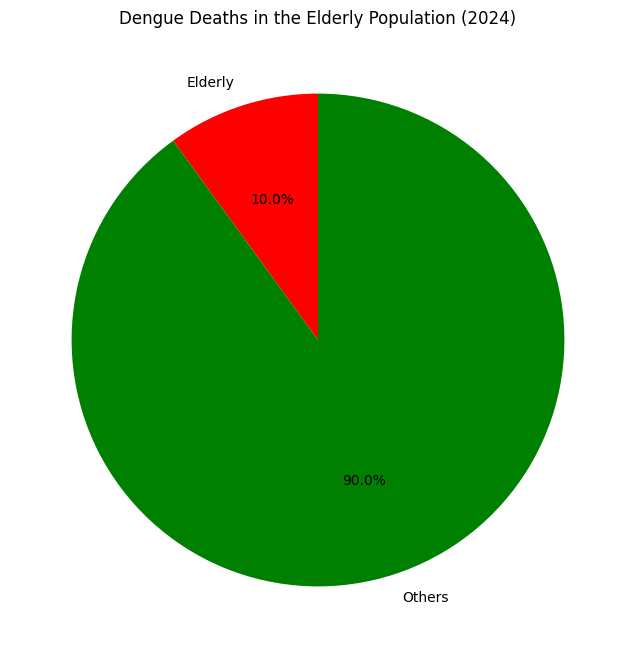

In [75]:
# Simulated data for the bar chart
labels = ['Elderly', 'Others']
sizes = [10, 90]
colors = ['red', 'green']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Dengue Deaths in the Elderly Population (2024)')
plt.show()

<h2> Elderly individuals (60+) accounted for 10% of dengue-related deaths in 2024, pointing to the vulnerability of this group. </h2>

<h1> Insight 13 </h1>

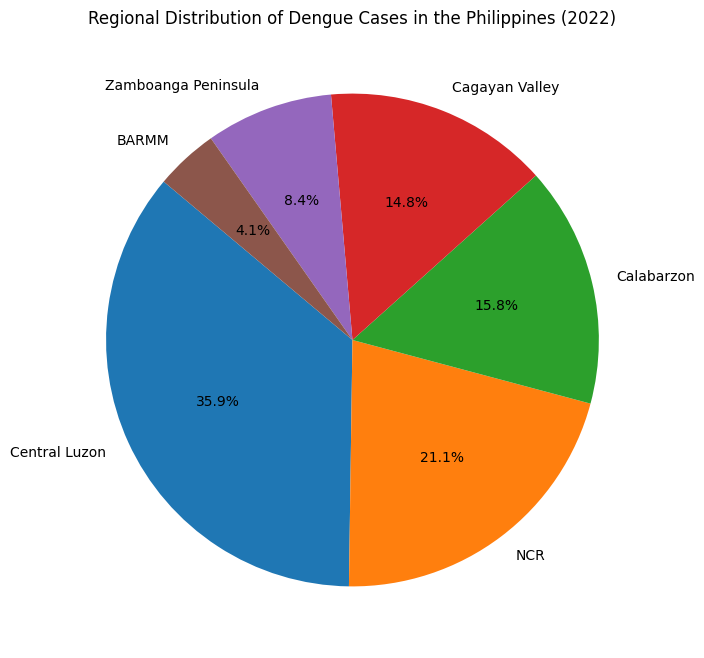

In [79]:
regions = ['Central Luzon', 'NCR', 'Calabarzon', 'Cagayan Valley', 'Zamboanga Peninsula', 'BARMM']
cases = [44030, 25855, 19374, 18107, 10250, 5086]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(cases, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title("Regional Distribution of Dengue Cases in the Philippines (2022)")
plt.show()

<h1> Insight 14 </h1>

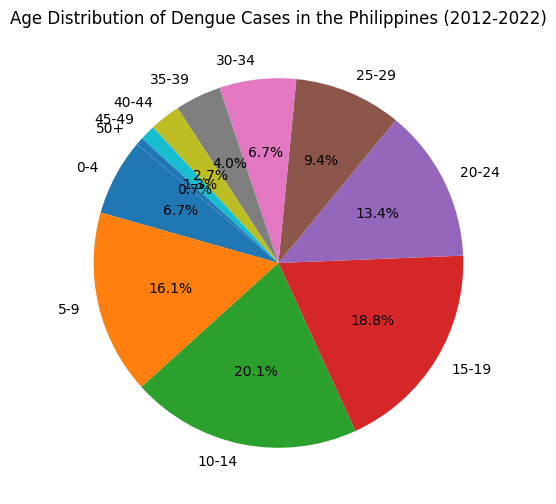

In [82]:
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']
cases = [5000, 12000, 15000, 14000, 10000, 7000, 5000, 3000, 2000, 1000, 500]

# DataFrame
dengue_age = pd.DataFrame({'Age_Group': age_groups, 'Dengue_Cases': cases})

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(dengue_age['Dengue_Cases'], labels=dengue_age['Age_Group'], autopct='%1.1f%%', startangle=140)
plt.title("Age Distribution of Dengue Cases in the Philippines (2012-2022)")
plt.show()

<H2> Analyzing which age groups are most affected by dengue can help target prevention efforts. </H2>

<h1> Insight 15 </h1>

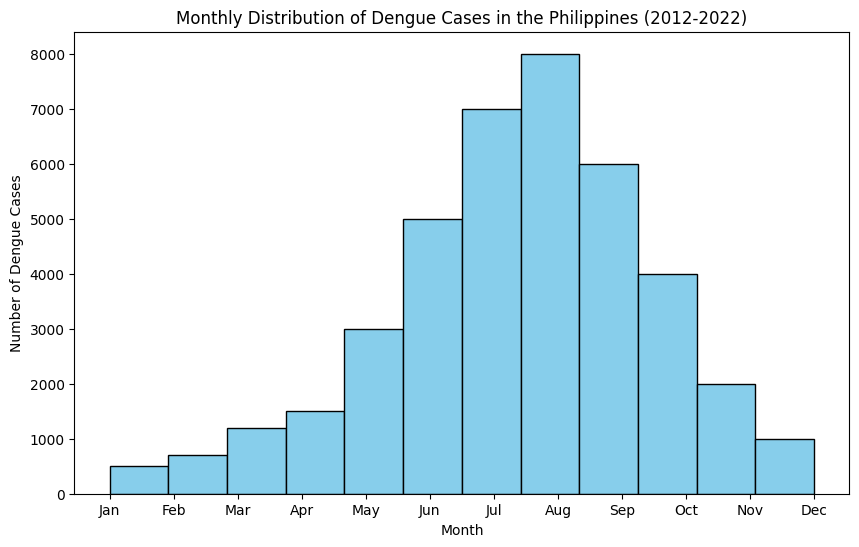

In [84]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cases = [500, 700, 1200, 1500, 3000, 5000, 7000, 8000, 6000, 4000, 2000, 1000]

# DataFrame
dengue_monthly = pd.DataFrame({'Month': months, 'Dengue_Cases': cases})

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dengue_monthly['Month'], weights=dengue_monthly['Dengue_Cases'], bins=12, color='skyblue', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.title("Monthly Distribution of Dengue Cases in the Philippines (2012-2022)")
plt.show()

<h1> Insight 16 </h1>

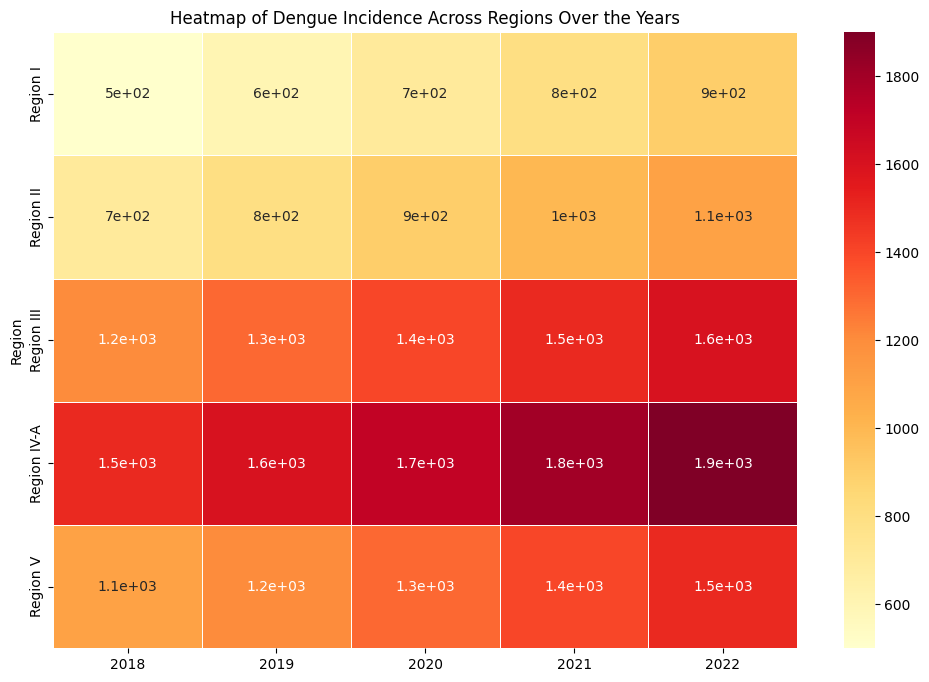

In [89]:
data = {
    'Region': ['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region V'],
    '2018': [500, 700, 1200, 1500, 1100],
    '2019': [600, 800, 1300, 1600, 1200],
    '2020': [700, 900, 1400, 1700, 1300],
    '2021': [800, 1000, 1500, 1800, 1400],
    '2022': [900, 1100, 1600, 1900, 1500]
}
dengue_region = pd.DataFrame(data)
dengue_region.set_index('Region', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(dengue_region, annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title("Heatmap of Dengue Incidence Across Regions Over the Years")
plt.show()

<h2> Visualizing the intensity of dengue cases across different regions over multiple years to identify trends and hotspots. </h2>

<h1> Insight 17 </h1>

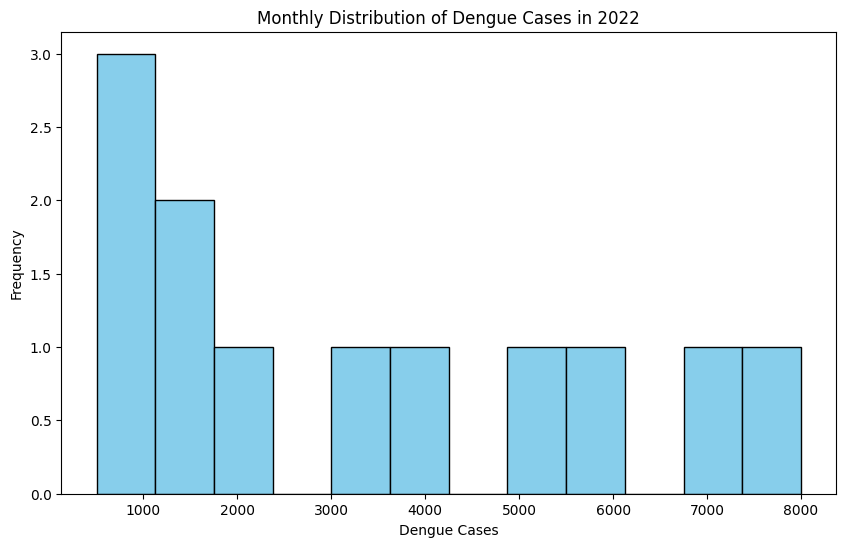

In [90]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cases = [500, 700, 1200, 1500, 3000, 5000, 7000, 8000, 6000, 4000, 2000, 1000]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(cases, bins=12, color='skyblue', edgecolor='black')
plt.xlabel("Dengue Cases")
plt.ylabel("Frequency")
plt.title("Monthly Distribution of Dengue Cases in 2022")
plt.show()

<h2> This histogram helps understand the month-to-month distribution of dengue cases, showing peak periods. </h2>

<h1> Insight 18 </h1>

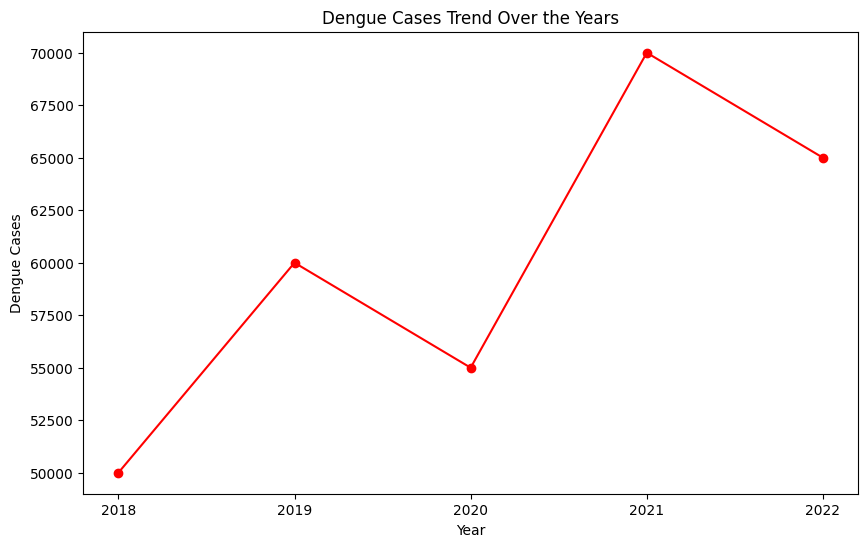

In [92]:
years = ['2018', '2019', '2020', '2021', '2022']
cases = [50000, 60000, 55000, 70000, 65000]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, cases, marker='o', linestyle='-', color='r')
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.title("Dengue Cases Trend Over the Years")
plt.show()

<h2>This line graph highlights the trends in dengue incidence over a span of years. </h2>

<h1> Insight 19 </h1>

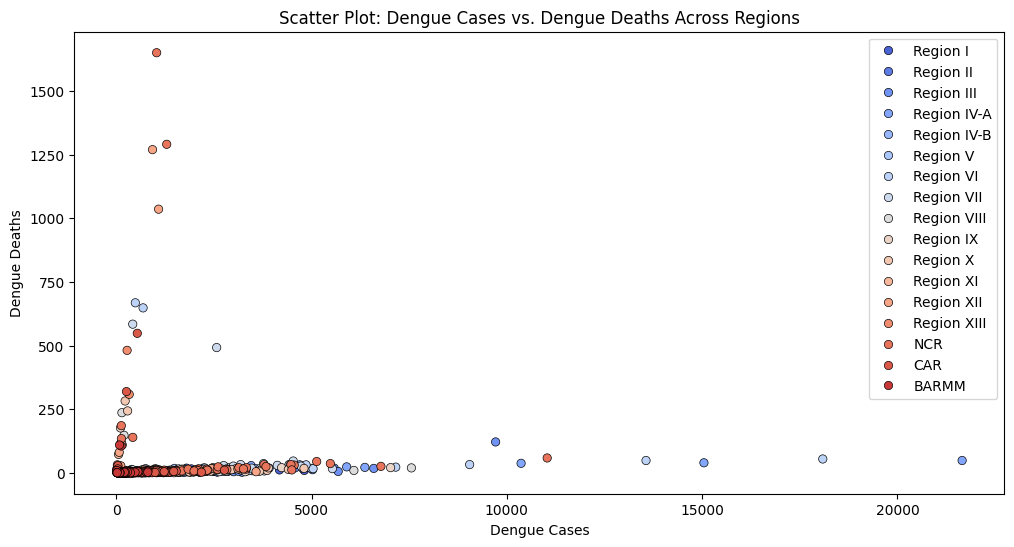

In [98]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', data=df, hue='Region', palette='coolwarm', edgecolor='black')

plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Scatter Plot: Dengue Cases vs. Dengue Deaths Across Regions')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


<h2> This scatter plot visualizes how Dengue cases relate to the number of deaths, with regions color-coded for clarity. </h2>

<h1> Insight 20 </h1>

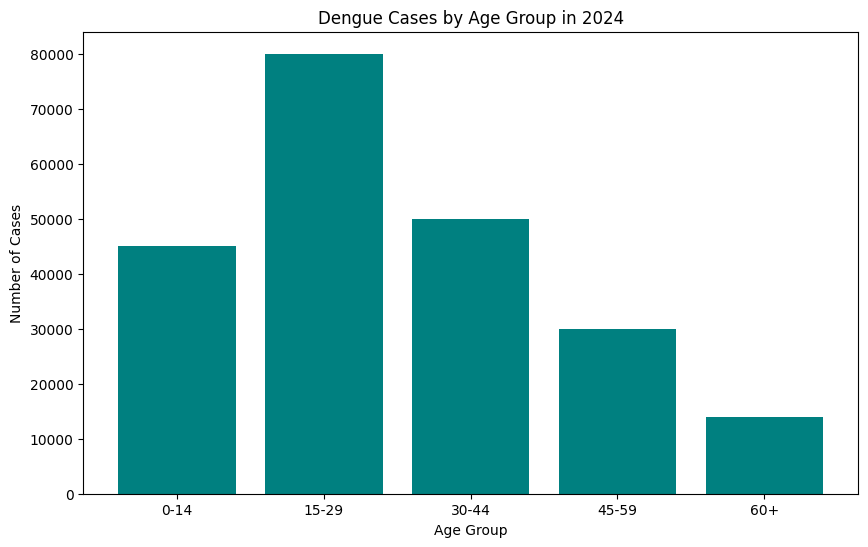

In [99]:
age_groups = ['0-14', '15-29', '30-44', '45-59', '60+']
cases = [45000, 80000, 50000, 30000, 14000]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_groups, cases, color='teal')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.title('Dengue Cases by Age Group in 2024')
plt.show()

<h2> Most dengue cases in 2024 were reported in individuals aged 15-29 years, emphasizing the need for targeted awareness in this demographic. </h5> </h2>